#### Six dimensional Tracking Model

$$
\begin{align*}
\begin{cases}
x_{n+1}=x_n +\eta F x_n+\sqrt{\eta} w_n \\
y_{n+1}=y_n +\eta h(x_n)+\sqrt{\eta} \sigma_1 v_n
\end{cases}
\end{align*}
$$
where
$$F=
\begin{bmatrix} 
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & -w_1^2 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0  \\
0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & -w_2^2
\end{bmatrix}$$
and the function $h(x)$ is defined as
$$h(x)=\big[\sqrt{x_1^2+x_4^2}, \tan^{-1}(x_4/x_1), x_2, x_3, x_5, x_6\big]$$
where $x=(x_1,x_2,x_3,x_4,x_5,x_6)'$.

In [1]:
import Ex4_loader
import Ex4_generator
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

In [2]:
PATH_TRAIN='../datas/ex4Train.pklz'

dimX=6; N=100; n0=10; eta=0.04; dimY=6

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=Ex4_loader.load_data_wrapper(PATH_TRAIN)

test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),dimX)
len(training_data)

16956

In [3]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 128, 64, 32, 8, dimX])
epoch=200

In [4]:
tcMSE_EpochAdalr1, tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.001, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.005, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0017404382705258005
Epoch 0: 1.0897234022411697
The eta of Epoch 1 is 0.0018692125903139612
Epoch 1: 0.8580057020508394
The eta of Epoch 2 is 0.0019078357685540994
Epoch 2: 0.7568362864756807
The eta of Epoch 3 is 0.001935884386943353
Epoch 3: 0.7026091683569778
The eta of Epoch 4 is 0.002016519460748172
Epoch 4: 0.6489696602484084
The eta of Epoch 5 is 0.0021138372459881196
Epoch 5: 0.5789075179947101
The eta of Epoch 6 is 0.0022432098404529133
Epoch 6: 0.4778459258663072
The eta of Epoch 7 is 0.002361528122814209
Epoch 7: 0.4002670996376647
The eta of Epoch 8 is 0.0024037845935833066
Epoch 8: 0.35045606675220736
The eta of Epoch 9 is 0.0024627936109923184
Epoch 9: 0.32156118362856234
The eta of Epoch 10 is 0.0025618901055953864
Epoch 10: 0.3024219685369421
The eta of Epoch 11 is 0.002605353911625728
Epoch 11: 0.28736341377172525
The eta of Epoch 12 is 0.0026453495078319774
Epoch 12: 

In [5]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1, constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10, ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 1.0950432378943449
The eta of Epoch 1 is 0.001
Epoch 1: 0.9281231895735904
The eta of Epoch 2 is 0.001
Epoch 2: 0.8409266698631398
The eta of Epoch 3 is 0.001
Epoch 3: 0.7837743588368579
The eta of Epoch 4 is 0.001
Epoch 4: 0.7448603127374348
The eta of Epoch 5 is 0.001
Epoch 5: 0.7163838906640172
The eta of Epoch 6 is 0.001
Epoch 6: 0.6925996776057806
The eta of Epoch 7 is 0.001
Epoch 7: 0.6612720331320556
The eta of Epoch 8 is 0.001
Epoch 8: 0.628013838297814
The eta of Epoch 9 is 0.001
Epoch 9: 0.5912023121887161
The eta of Epoch 10 is 0.001
Epoch 10: 0.5418137357002325
The eta of Epoch 11 is 0.001
Epoch 11: 0.4923341464035346
The eta of Epoch 12 is 0.001
Epoch 12: 0.4525395855828678
The eta of Epoch 13 is 0.001
Epoch 13: 0.4186066829953909
The eta of Epoch 14 is 0.001
Epoch 14: 0.3896976544211547
The eta of Epoch 15 is 0.001
Epoch 15: 0.3669490961173077
The eta of

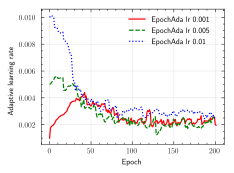

In [6]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle']):
    plt.plot(epochs,EpochAdalr1,'#FB0006',epochs,EpochAdalr5,'g',epochs, EpochAdalr10,'b',linewidth=1.2)
    plt.grid(alpha=0.35)
    #plt.minorticks_on()
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"], edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive learning rate")

plt.savefig("../img/Ex4-lr.pdf",dpi=600, bbox_inches = 'tight')

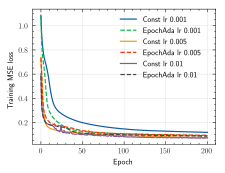

In [7]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle','std-colors.mplstyle']):
    plt.plot(Epochs, tcMSE_constlr1,Epochs, tcMSE_EpochAdalr1, '--', Epochs, tcMSE_constlr5,\
        Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10, Epochs,tcMSE_EpochAdalr10,'--',linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["Const lr 0.001","EpochAda lr 0.001","Const lr 0.005","EpochAda lr 0.005","Const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Training MSE loss")

plt.savefig("../img/Ex4-loss.pdf", dpi=600,bbox_inches = 'tight')

In [8]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label, label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    return (mseErr, RelErr)

In [9]:
# Generate out-of-samples to compute relative errors
N_sample=256
x0=np.array([[0.8],[0.2],[1],[-1],[0.5],[1]])

TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    datas1, labels1, x_new1=Ex4_generator.generate_new_data(data_mean, data_std)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [10]:
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ErrEpochAdalr1=ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ErrEpochAdalr5=ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ErrEpochAdalr10=ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

print('>>> relative error for initial lr 0.001 is ' + str(ErrEpochAdalr1[1]))
print('>>> relative error for initial lr 0.005 is ' + str(ErrEpochAdalr5[1]))
print('>>> relative error for initial lr 0.01 is ' + str(ErrEpochAdalr10[1]))

>>> relative error for initial lr 0.001 is 0.1822068980680653
>>> relative error for initial lr 0.005 is 0.18480612096166066
>>> relative error for initial lr 0.01 is 0.1808677938625003


In [91]:
datas, labels, x_new =Ex4_generator.generate_new_data(data_mean, data_std)

In [12]:
# retrain the model with converged learning rate
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr,constlr\
=net.SGD_Constlr(training_data, epoch, 64, 0.0025, evaluation_data=validation_data)
tcMSE_EpochAdalr,tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.0025, 0.001, 0.01, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.0025
The eta of Epoch 0 is 0.0025
Epoch 0: 0.8790627745713511
The eta of Epoch 1 is 0.0025
Epoch 1: 0.7447054557018343
The eta of Epoch 2 is 0.0025
Epoch 2: 0.6742613655826739
The eta of Epoch 3 is 0.0025
Epoch 3: 0.5925501591461998
The eta of Epoch 4 is 0.0025
Epoch 4: 0.49862024998653937
The eta of Epoch 5 is 0.0025
Epoch 5: 0.3991477716710593
The eta of Epoch 6 is 0.0025
Epoch 6: 0.3482120929614738
The eta of Epoch 7 is 0.0025
Epoch 7: 0.3201089475969714
The eta of Epoch 8 is 0.0025
Epoch 8: 0.302380102855876
The eta of Epoch 9 is 0.0025
Epoch 9: 0.28859982718992544
The eta of Epoch 10 is 0.0025
Epoch 10: 0.27742209297299764
The eta of Epoch 11 is 0.0025
Epoch 11: 0.26729778449861225
The eta of Epoch 12 is 0.0025
Epoch 12: 0.25965780572240377
The eta of Epoch 13 is 0.0025
Epoch 13: 0.2508157507303106
The eta of Epoch 14 is 0.0025
Epoch 14: 0.24312208608873923
The eta of Epoch 15 is 0.0025
Epoch 15: 0.2363

In [92]:
pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [93]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

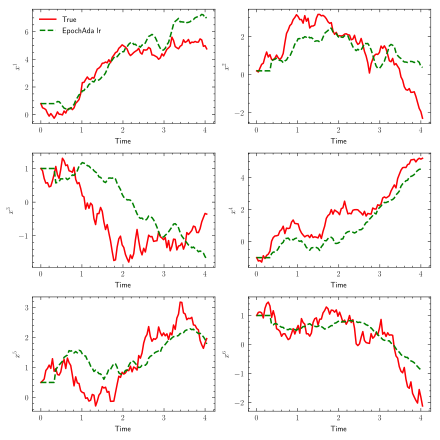

In [94]:
axis=np.linspace(0,eta*(N+1),N+1)
plt.style.reload_library()
with plt.style.context(['science.mplstyle','ieee.mplstyle']):
    fig, ax=plt.subplots(3,2,figsize=(6,6),constrained_layout=True)

    ax[0][0].plot(axis,x_new[:,0],'#FB0006',axis, ada_new[:,0],'g', linewidth=1.5)
    ax[0][0].minorticks_on()
    ax[0][0].set(xlabel="Time", ylabel="$x^1$")

    ax[0][1].plot(axis,x_new[:,1],'#FB0006', axis, ada_new[:,1],'g',linewidth=1.5)
    ax[0][1].minorticks_on()
    ax[0][1].set(xlabel="Time", ylabel="$x^2$")

    ax[1][0].plot(axis,x_new[:,2],'#FB0006',axis, ada_new[:,2],'g',linewidth=1.5)
    ax[1][0].minorticks_on()
    ax[1][0].set(xlabel="Time", ylabel="$x^3$")

    ax[1][1].plot(axis,x_new[:,3],'#FB0006', axis, ada_new[:,3],'g', linewidth=1.5)
    ax[1][1].minorticks_on()
    ax[1][1].set(xlabel="Time", ylabel="$x^4$")

    ax[2][0].plot(axis,x_new[:,4],'#FB0006', axis, ada_new[:,4],'g', linewidth=1.5)
    ax[2][0].minorticks_on()
    ax[2][0].set(xlabel="Time", ylabel="$x^5$")

    ax[2][1].plot(axis,x_new[:,5],'#FB0006', axis, ada_new[:,5],'g',linewidth=1.5)
    ax[2][1].minorticks_on()
    ax[2][1].set(xlabel="Time", ylabel="$x^6$")

    ax[0][0].legend(["True","EpochAda lr"],prop={'size':8}, edgecolor="black")

plt.savefig("../img/Ex4-path.pdf",dpi=600, bbox_inches = 'tight')